In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
ever_married_series = pd.DataFrame(np.where(df['ever_married'] == 'Yes', 1, 0))
cleaned_df = pd.concat([df, ever_married_series], axis = 1)
cleaned_df.rename(columns={0: "ever_married_cleaned"}, inplace=True)
cleaned_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cleaned
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [3]:
stroke_df = cleaned_df[cleaned_df['stroke'] == 1]
no_stroke_df = cleaned_df[cleaned_df['stroke'] == 0]

In [4]:
stroke_marriage = stroke_df['ever_married_cleaned'].mean()
nostroke_marriage = no_stroke_df['ever_married_cleaned'].mean()
total_marriage = cleaned_df['ever_married_cleaned'].mean()
print(stroke_marriage, nostroke_marriage, total_marriage)

0.8835341365461847 0.6445175889734622 0.6561643835616439


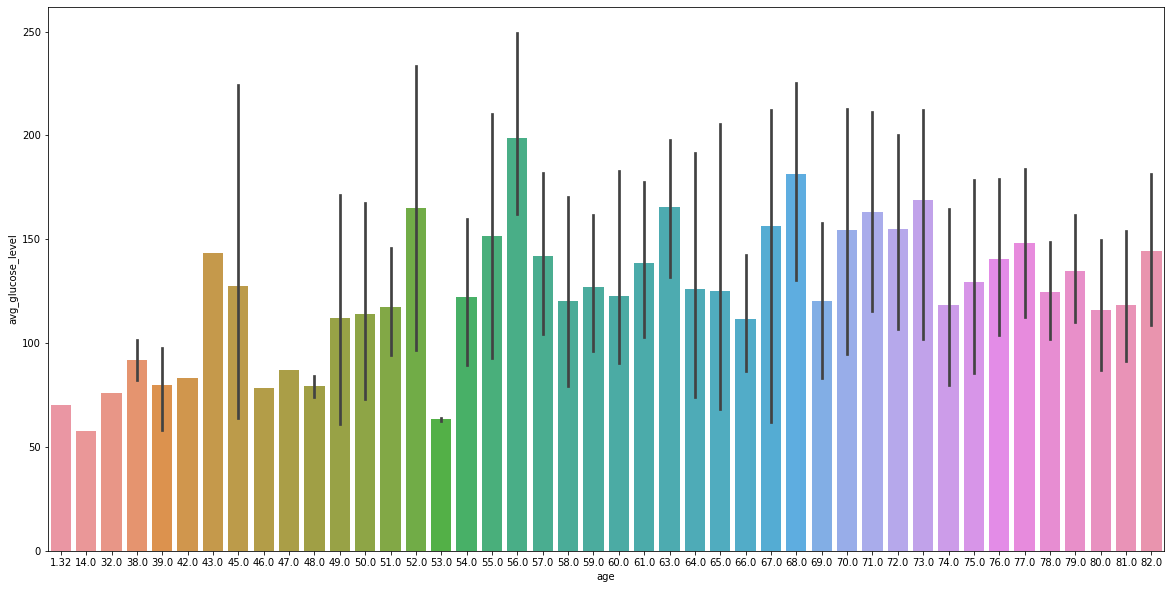

In [5]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
test = stroke_df[['age', 'avg_glucose_level']]
sns.barplot(x = "age", y = "avg_glucose_level", data=test)
plt.show()

In [6]:
#death_blood_pressure = df[['DEATH_EVENT', 'high_blood_pressure']]
#corrMatrix = death_blood_pressure.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [7]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

train_len = int(len(cleaned_df) * 0.8)

marr_train = cleaned_df['ever_married_cleaned'][:train_len]

marr_test = cleaned_df['ever_married_cleaned'][train_len:]

marr_train, marr_test = np.array(marr_train, np.float32), np.array(marr_test, np.float32)

In [8]:


#marr_train, marr_test = marr_train.reshape([-1, num_features]), marr_test.reshape([-1, num_features])

#marr_train, marr_test = marr_train / 255., marr_test / 255.


In [9]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [10]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff



In [11]:
from imblearn.over_sampling import SMOTE
cleaned_df.dropna(inplace=True)
cleaned_df = cleaned_df.sample(frac=1)
# Define our features/target
X = cleaned_df[['age','avg_glucose_level','bmi']]
# Target data['target'] = 0 is not ur mom stroke rnf, 1 is stroke
Y = cleaned_df.stroke

In [12]:
# Create a 80-20 train-test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=5)

# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train.ravel())

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 7532
Test Data Size: 982


In [13]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')
# fit_intercept=True, solver = 'lbfgs'

lr.fit(x_train,y_train) 
train_accuracy = np.mean(y_train == lr.predict(x_train))
test_accuracy = np.mean(y_test == lr.predict(x_test))

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.7561
Test accuracy: 0.7413


Confusion matrix, without normalization
[[686 248]
 [  6  42]]
Normalized confusion matrix
[[0.73447537 0.26552463]
 [0.125      0.875     ]]


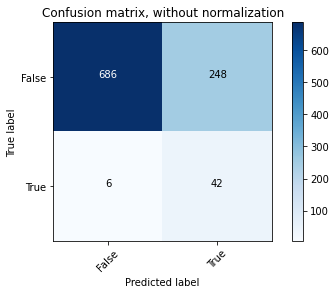

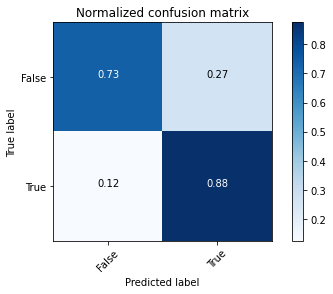

In [14]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [15]:
y_pred = lr.predict(x_test) 

TP = np.sum((y_pred == y_test) & (y_test == 1))
TN = np.sum((y_pred == y_test) & (y_test == 1))
FP = np.sum((y_pred != y_test) & (y_test == 0))
FN = np.sum((y_pred != y_test) & (y_test == 1))


precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.1448
recall = 0.8750


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


#print (df)

X = cleaned_df[['age','avg_glucose_level','bmi']]
y = cleaned_df['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

NameError: name 'sn' is not defined

In [ ]:
print (X_test) #test dataset
print (y_pred) #predicted values

       age  avg_glucose_level   bmi
2371  25.0              65.77  23.7
3892  37.0             173.97  26.3
391   26.0             120.31  22.3
2925  25.0              83.33  31.5
97    58.0             240.59  31.4
...    ...                ...   ...
1661  63.0             109.65  28.6
662   28.0              87.43  55.7
2229  54.0             104.42  37.6
2298  62.0             124.26  33.4
3183  37.0              76.21  20.4

[1228 rows x 3 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

<AxesSubplot:xlabel='stroke', ylabel='count'>

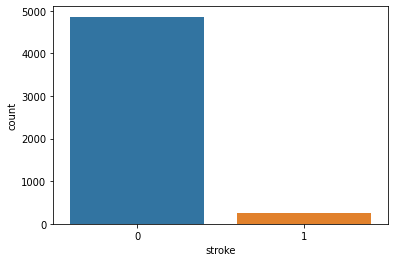

In [ ]:
sns.countplot(x='stroke', data=cleaned_df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

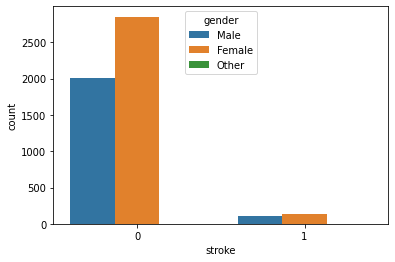

In [ ]:
sns.countplot(x='stroke', hue='gender', data=cleaned_df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

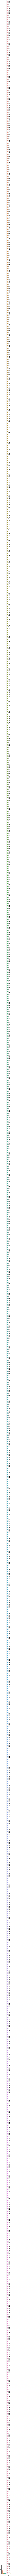

In [ ]:
sns.countplot(x='stroke', hue='avg_glucose_level', data=cleaned_df)


(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

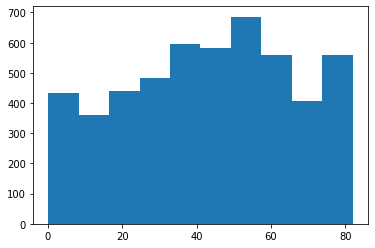

In [ ]:
plt.hist(cleaned_df['age'])

In [ ]:
gender_data = pd.get_dummies(cleaned_df['gender'], drop_first=True)
cleaned_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_cleaned
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [ ]:
cleaned_df = pd.concat([cleaned_df, gender_data], axis = 1)
cleaned_df.drop('gender', 1, inplace=True)
cleaned_df.drop('ever_married', 1, inplace=True)
cleaned_df.drop('work_type', 1, inplace=True)
cleaned_df.drop('Residence_type', 1, inplace=True)
cleaned_df.drop('smoking_status', 1, inplace=True)
cleaned_df.dropna(inplace=True)
cleaned_df.sample(frac=1).reset_index(drop=True, inplace=True)
cleaned_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_cleaned,Male,Other
0,9046,67.0,0,1,228.69,36.6,1,1,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0
4,1665,79.0,1,0,174.12,24.0,1,1,0,0
5,56669,81.0,0,0,186.21,29.0,1,1,1,0


In [ ]:
y_data = cleaned_df['stroke']

x_data = cleaned_df.drop('stroke', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

model = LogisticRegression()

model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [ ]:
classification_report(y_test_data, predictions)






'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      1411\n           1       0.33      0.02      0.03        62\n\n    accuracy                           0.96      1473\n   macro avg       0.65      0.51      0.50      1473\nweighted avg       0.93      0.96      0.94      1473\n'

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[1409    2]
 [  61    1]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d5d2442-b8ce-455e-92a9-1e08ba8d36fe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>